## 作业2：ADAMS和RK4数值积分的实现
仿照run_euler函数的实现，在modsim中实现Adams和四阶Runge-Kutta法，并使用炮弹发射仿真比较Euler、Adams和RK4三种数值积分的精度。实现run_adams和run_rk4函数。

In [65]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [66]:
def run_euler(system, slope_func, **options):
    """Computes a numerical solution to a differential equation.

    `system` must contain `init` with initial conditions,
    `t_end` with the end time, and `dt` with the time step.

    `system` may contain `t_0` to override the default, 0

    It can contain any other parameters required by the slope function.

    `options` can be ...

    system: System object
    slope_func: function that computes slopes

    returns: TimeFrame
    """
    # the default message if nothing changes
    msg = "The solver successfully reached the end of the integration interval."

    # get parameters from system
    init, t_0, t_end, dt = check_system(system, slope_func)

    # make the TimeFrame
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt) * get_units(t_end)

    # run the solver
    for t1 in ts:
        y1 = frame.row[t1]
        slopes = slope_func(y1, t1, system)
        y2 = [y + slope * dt for y, slope in zip(y1, slopes)]
        t2 = t1 + dt
        frame.row[t2] = y2

    details = ModSimSeries(dict(message="Success"))
    return frame, details

In [67]:

def run_adams(system,slope_func, **options):
    """Computes a numerical solution to a differential equation.

    `system` must contain `init` with initial conditions,
    `t_end` with the end time, and `dt` with the time step, `t_0` with the default, 0 or others

    It can contain any other parameters required by the slope function.

    `options` can be ...

    system: System object
    slope_func: function that computes slopes

    returns: TimeFrame
    """
    #the default message if nothing changes
    msg="The solver successfully reached the end of the integration interval."
    
    #get parameters from system
    init=system.init
    t_0=system.t_0
    t_end=system.t_end
    system.t_end=dt*4
    
    #make the TimeFrame
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt*3,t_end,dt)*get_units(t_end)
    system.t_end=t_end

    #run the solver
    for t1 in ts:
        y1=frame.row[round(t1,2)]
        slopes=slope_func(y1,round(t1,2),system)
        y2=[y+55/24*slope*dt for y,slope in zip(y1,slopes)]
        
        y1=frame.row[round(t1-dt,2)]
        slopes=slope_func(y1,round(t1-dt,2),system)
        y2=[y-59/24*slope*dt for y,slope in zip(y2,slopes)]
        
        y1=frame.row[round(t1-dt*2,2)]
        slopes=slope_func(y1,round(t1-dt*2,2),system)
        y2=[y+37/24*slope*dt for y,slope in zip(y2,slopes)]
        
        y1=frame.row[round(t1-dt*3,2)]
        slopes=slope_func(y1,round(t1-dt*3,2),system)
        y2=[y-9/24*slope*dt for y,slope in zip(y2,slopes)]
        
        t2=round(t1+dt,2)
        frame.row[t2]=y2
                
    details = ModSimSeries(dict(message="Success"))
    return frame, details

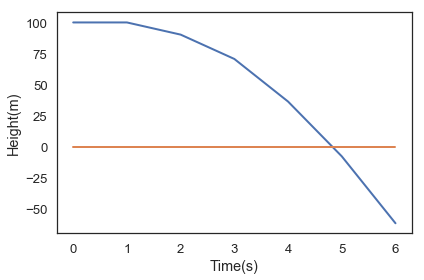

In [68]:
m = UNITS.meter
s = UNITS.second

g = 9.8 * m/s**2

init_z = State(y=100.0 * m, v=0.0 * m/s)
init_x = State(y=0.0 * m, v=500.0 * m/s)


t_end = 6 * s
dt = 1 * s

system_z = System(init=init_z,t_0=t_0,t_end=t_end, dt=dt, g=g)
system_x = System(init=init_x,t_0=t_0,t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 * m/s**2
    
    return dydt, dvdt

Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)

results_z,details_z = run_adams(system_z, slope_func_z)
results_x,details_x = run_adams(system_x, slope_func_x)

plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)

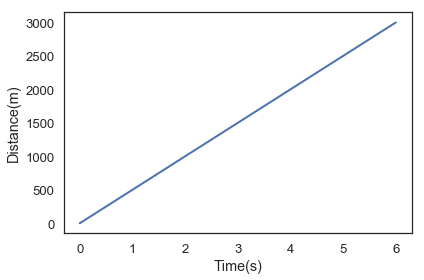

In [69]:
plot(results_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

In [70]:
def run_rk4(system,slope_func, **options):
    """Computes a numerical solution to a differential equation.

    `system` must contain `init` with initial conditions,
    `t_end` with the end time, and `dt` with the time step, `t_0` with the default, 0 or others

    It can contain any other parameters required by the slope function.

    `options` can be ...

    system: System object
    slope_func: function that computes slopes

    returns: TimeFrame
    """    
    #the default message if nothing changes
    msg="The solver successfully reached the end of the integration interval."
    
    #get parameters from system
    init=system.init
    t_0=system.t_0
    t_end=system.t_end
    system.t_end=dt*4
    
    #make the TimeFrame
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt*3,t_end,dt)*get_units(t_end)
    system.t_end=t_end

    #run the solver
    for t1 in ts:
        y1=frame.row[round(t1,2)]
        slopes=slope_func(y1,round(t1,2),system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y1,slopes)]
        
        y2=[y+1/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y2,round(t1+dt/2,2),system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y3=[y+2/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y3,round(t1+dt/2,2),system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y4=[y+2/6*slope*dt for y,slope in zip(y1,slopes)]
        slopes=slope_func(y4,round(t1+dt,2),system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        t2=round(t1+dt,2)
        frame.row[t2]=y_0

    details = ModSimSeries(dict(message="Success"))
    return frame, details

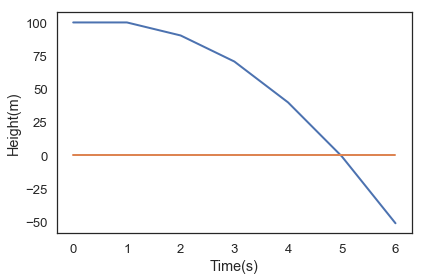

In [71]:
m = UNITS.meter
s = UNITS.second

g = 9.8 * m/s**2

init_z = State(y=100.0 * m, v=0.0 * m/s)
init_x = State(y=0.0 * m, v=500.0 * m/s)


t_end = 6 * s
dt = 1 * s

system_z = System(init=init_z,t_0=t_0,t_end=t_end, dt=dt, g=g)
system_x = System(init=init_x,t_0=t_0,t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 * m/s**2
    
    return dydt, dvdt

Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)

results_z,details_z = run_rk4(system_z, slope_func_z)
results_x,details_x = run_rk4(system_x, slope_func_x)

plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)

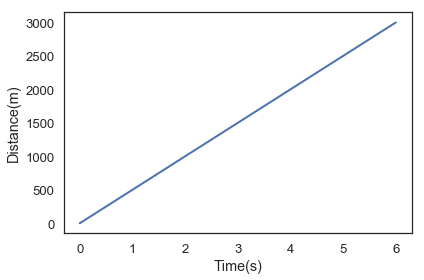

In [72]:
plot(results_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')